#  Building  Recommender System

##  Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Load Data

In [4]:
dataset_rating=pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")
dataset_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>],
       [<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'timestamp'}>]], dtype=object)

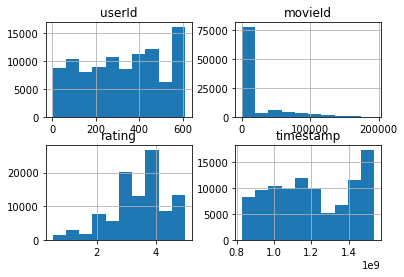

In [5]:
dataset_rating.hist()

In [6]:
dataset_movies=pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")
dataset_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
dataset_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [12]:
dataset_rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Checking for per user total movies frequency

In [15]:
user_movie=dataset_rating[["userId","movieId"]].groupby('userId').count().reset_index()
user_movie.columns=["userID","total_rating"]
user_movie.head()

,userID,total_rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44


 Here we got the  totat rating per user |

##  Data Analysis 

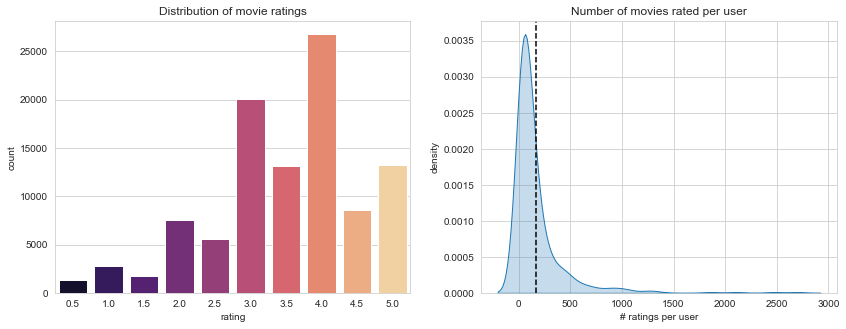

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="rating", data=dataset_rating, palette="magma")
plt.title("Distribution of movie ratings")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_movie['total_rating'], shade=True, legend=False)
plt.axvline(user_movie['total_rating'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings per user")
plt.ylabel("density")
plt.title("Number of movies rated per user")
plt.show()